### Mac OS 한글 폰트 설정

In [4]:
from matplotlib import rc
rc('font', family='AppleGothic')

## 함수 4(시각화 블록)

- input: Dataframe
- output: Graph

### 1. Matplotlib 시각화

- input: Dataframe
- output: Matplotlib 그래프

In [2]:
import pickle
"""
dataframe_path는 커스텀이 필요함 !
본인이 pickle file 다운로드 한 경로로 설정할 것
"""
dataframe_path = "./dataframe.pkl"
with open(dataframe_path,"rb") as f:
    res = pickle.load(f)

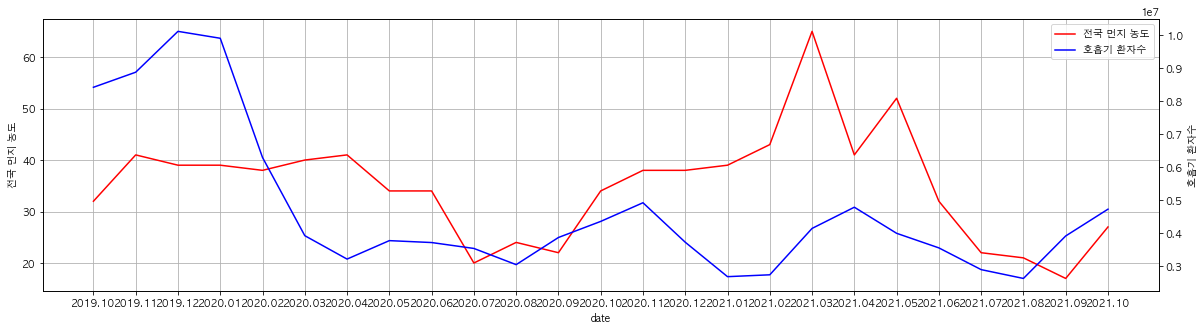

In [5]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))

ax2 = ax1.twinx()
lns1 = ax1.plot(res['날짜'], res['전국 먼지 농도'], label='전국 먼지 농도', color='red')
lns2 = ax2.plot(res['날짜'], res['환자수 합계'], label='호흡기 환자수', color='blue')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.grid()
ax1.set_xlabel("date")
ax1.set_ylabel("전국 먼지 농도")
ax2.set_ylabel("호흡기 환자수")
plt.show()


### 2. Pyecharts 시각화

- input: Dataframe
- output: 청년/노년층 시각화 그래프 HTML

In [10]:
import pickle
import pandas as pd
import numpy as np

"""
dataframe_path는 커스텀이 필요함 !
본인이 pickle file 다운로드 한 경로로 설정할 것
"""

dataframe_path = "./age.pkl"
with open(dataframe_path,"rb") as f:
    df = pickle.load(f)

In [9]:
df.reset_index(drop=True,inplace=True)
young = pd.concat([df.iloc[4:6,:],df.iloc[14:16,:]]).groupby(['나이']).sum()
young.loc['청년_총계'] = young.sum().values

old = pd.concat([df.iloc[8:10,:],df.iloc[18:20,:]]).groupby(['나이']).sum()
old.loc['노년_총계'] = old.sum()

#### 청년 그래프

In [11]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.preprocessing import MinMaxScaler

# Create the first bar chart object
bar_chart1 = Bar()
bar_chart1.add_xaxis(list(res.날짜))
dust_data = list(res['전국 먼지 농도'])
dust_scaler = MinMaxScaler()
dust_normalized = np.around(dust_scaler.fit_transform(np.array(dust_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart1.add_yaxis('전국 먼지 농도', list(dust_normalized))

# Create the second bar chart object
bar_chart2 = Bar()
bar_chart2.add_xaxis(list(res['전국 먼지 농도']))
patient_data = list(young.loc['청년_총계'].values)
patient_scaler = MinMaxScaler()
patient_normalized = np.around(patient_scaler.fit_transform(np.array(patient_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart2.add_yaxis('청년 호흡기 환자수', list(patient_normalized))

# Combine the two bar charts into a single chart object
combo_chart = bar_chart1.overlap(bar_chart2)

# Set the title and other options for the chart
combo_chart.set_global_opts(title_opts=opts.TitleOpts(title="청년층 날짜별 미세먼지/호흡기 환자 수 분포"),
                            xaxis_opts=opts.AxisOpts(name="날짜"),
                            yaxis_opts=opts.AxisOpts(name="미세먼지 농도/환자 수"))

# Render the chart to an HTML file
combo_chart.render("young_dust_sick.html")

'/Users/happyeon/Desktop/data_science/play_data/young_dust_sick.html'

#### 노년 그래프

In [12]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.preprocessing import MinMaxScaler
# Create the first bar chart object
bar_chart1 = Bar()
bar_chart1.add_xaxis(list(res.날짜))
dust_data = list(res['전국 먼지 농도'])
dust_scaler = MinMaxScaler()
dust_normalized = np.around(dust_scaler.fit_transform(np.array(dust_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart1.add_yaxis('전국 먼지 농도', list(dust_normalized))

# Create the second bar chart object
bar_chart2 = Bar()
bar_chart2.add_xaxis(list(res['전국 먼지 농도']))
patient_data = list(old.loc['노년_총계'].values)
patient_scaler = MinMaxScaler()
patient_normalized = np.around(patient_scaler.fit_transform(np.array(patient_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart2.add_yaxis('노년 호흡기 환자수', list(patient_normalized))

# Combine the two bar charts into a single chart object
combo_chart = bar_chart1.overlap(bar_chart2)

# Set the title and other options for the chart
combo_chart.set_global_opts(title_opts=opts.TitleOpts(title="노년층 날짜별 미세먼지/호흡기 환자 수 분포"),
                            xaxis_opts=opts.AxisOpts(name="날짜"),
                            yaxis_opts=opts.AxisOpts(name="미세먼지 농도/ 환자 수"))

# Render the chart to an HTML file
combo_chart.render("old_dust_sick.html")

'/Users/happyeon/Desktop/data_science/play_data/old_dust_sick.html'